In [10]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [11]:
# import data

df_original = pd.read_csv('adult.data.csv', header=None)

# cols
df_original.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df= df_original.copy()
print('Cantidad de registros: ', df.shape[0])

Cantidad de registros:  32561


In [12]:
# drop columnas que no nos interesan 
df.drop(['fnlwgt', 'native_country', 'education', 'relationship', 'capital_loss', 'capital_loss'], axis=1, inplace=True)

In [13]:
# segmentacion de columnas
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [14]:
# codificacion de variables categoricas
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# normalizacion de variables numericas
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:

def K_means_silhouette(df):
    '''
    Visualiza el coeficiente de silueta para determinar el número óptimo de clusters.
    Parameters:
        df (pd.DataFrame): Dataframe a utilizar.
        model_name (str): Nombre del modelo a utilizar.
        output_file_path (str): Path donde se guardará la visualización.  
    Returns:
        optimal_k (int): Número óptimo de clusters.
    '''
    k_range = range(2, 11)
    sil = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        score = silhouette_score(df, kmeans.labels_)
        sil.append(score)
    optimal_k = k_range[0]
    max_sil = float('-inf')
    for i, k in enumerate(k_range):
        if 2 < k < 8 and sil[i] > max_sil:
            max_sil = sil[i]
            optimal_k = k
            plt.figure(figsize=(10, 6))
            plt.plot(k_range, sil, marker='o')
            plt.xlabel('NÚMERO DE CLUSTERS (k)')
            plt.ylabel('COEFICIENTE DE SILUETA')
            plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
            plt.title(f'MÉTODO DE COEF. SILUETA', fontweight='bold', fontsize=12)
            return optimal_k

In [16]:
#K_means_silhouette(df)

In [17]:
# clustering
# kmeans
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster_kmeans'] = kmeans.fit_predict(df)

# agglomerative
#agg = AgglomerativeClustering(n_clusters=4)
#df['cluster_agg'] = agg.fit_predict(df)



Text(0.5, 1.0, 'PCA')

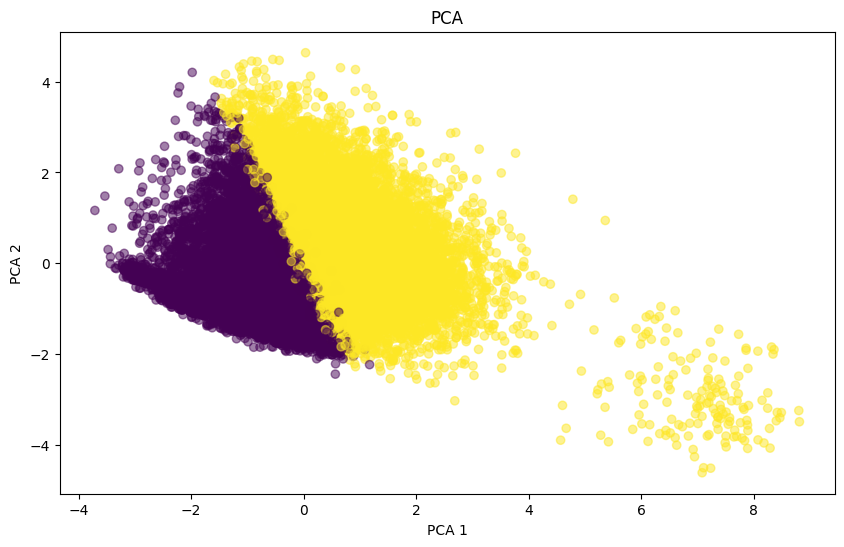

In [18]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

df_pca = pca.fit_transform(df.drop(['cluster_kmeans'], axis=1))

df['pca_1'] = df_pca[:, 0]
df['pca_2'] = df_pca[:, 1]

# plot
plt.figure(figsize=(10, 6))
plt.scatter(df['pca_1'], df['pca_2'], c=df['cluster_kmeans'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA')

